In [1]:
!pip install -Uqq fastai
!pip install -Uqq timm

In [2]:
import timm
from fastai.vision.all import *

C:\Users\Ananya\anaconda3\envs\tf\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
# from google.colab import drive
# drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# path = "drive/MyDrive/archive"
path = "archive"
files = get_image_files(path)
len(files)

2041

(600, 600)


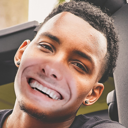

In [5]:
img = PILImage.create(files[66])
print(img.size)
img.to_thumb(128)

In [6]:
from fastcore.parallel import *

def f(o): return PILImage.create(o).size
sizes = parallel(f, files, n_workers=8)
pd.Series(sizes)

Due to IPython and Windows limitation, python multiprocessing isn't available now.
So `max_workers` has to be changed to 0 to avoid getting stuck


KeyboardInterrupt: 

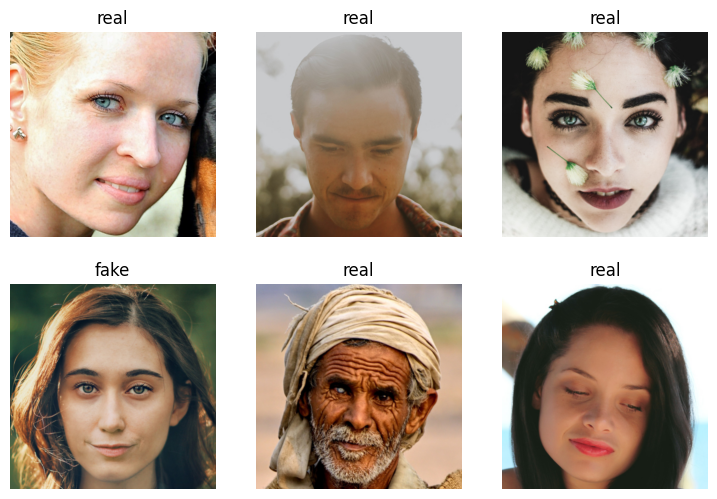

In [7]:
faces = DataBlock(
        blocks=(ImageBlock, CategoryBlock),
        get_items=get_image_files,
        splitter=RandomSplitter(valid_pct=0.2, seed=88),
        get_y=parent_label,
        item_tfms=Resize(400, ResizeMethod.Pad),
        batch_tfms=[]
)

dls = faces.dataloaders(path)

dls.valid.show_batch(max_n=6)

In [ ]:
learn = vision_learner(dls, vgg16_bn, metrics=Precision())
learn.lr_find(suggest_funcs=(valley, slide))
epochs = 30
lr = 0.01
learn.fine_tune(epochs, lr)

C:\Users\Ananya\anaconda3\envs\tf\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
C:\Users\Ananya\anaconda3\envs\tf\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_BN_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_BN_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/vgg16_bn-6c64b313.pth" to C:\Users\Ananya/.cache\torch\hub\checkpoints\vgg16_bn-6c64b313.pth
100%|███████████████████████████████████████████████████████████████████████████████| 528M/528M [04:54<00:00, 1.88MB/s]


In [ ]:
interp = ClassificationInterpretation.from_learner(learn)

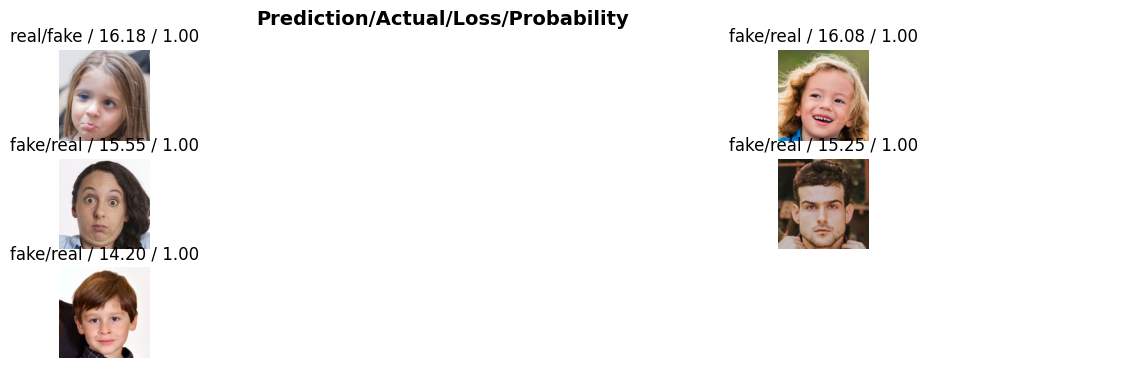

In [ ]:
interp.plot_top_losses(5, nrows=3, figsize=(17,4))